# Projeto de apredizado de máquinas

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [25]:
# Importando as bibliotecas (pandas, matplotlib, numpy)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Importando o dataset iris
from sklearn.datasets import load_iris
#obtendo dados de forma direta
X, y = load_iris(as_frame=True, return_X_y=True)

In [23]:
#ou por etapas
data = load_iris()
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['Target'] = data.target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Visualizando eses dados 2 a 2

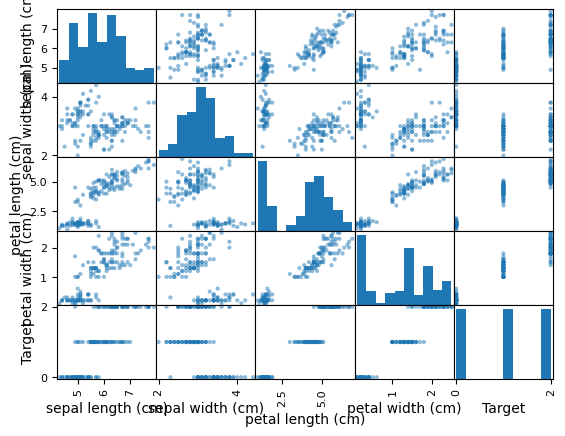

In [24]:
#usando o pandas
pd.plotting.scatter_matrix(iris);

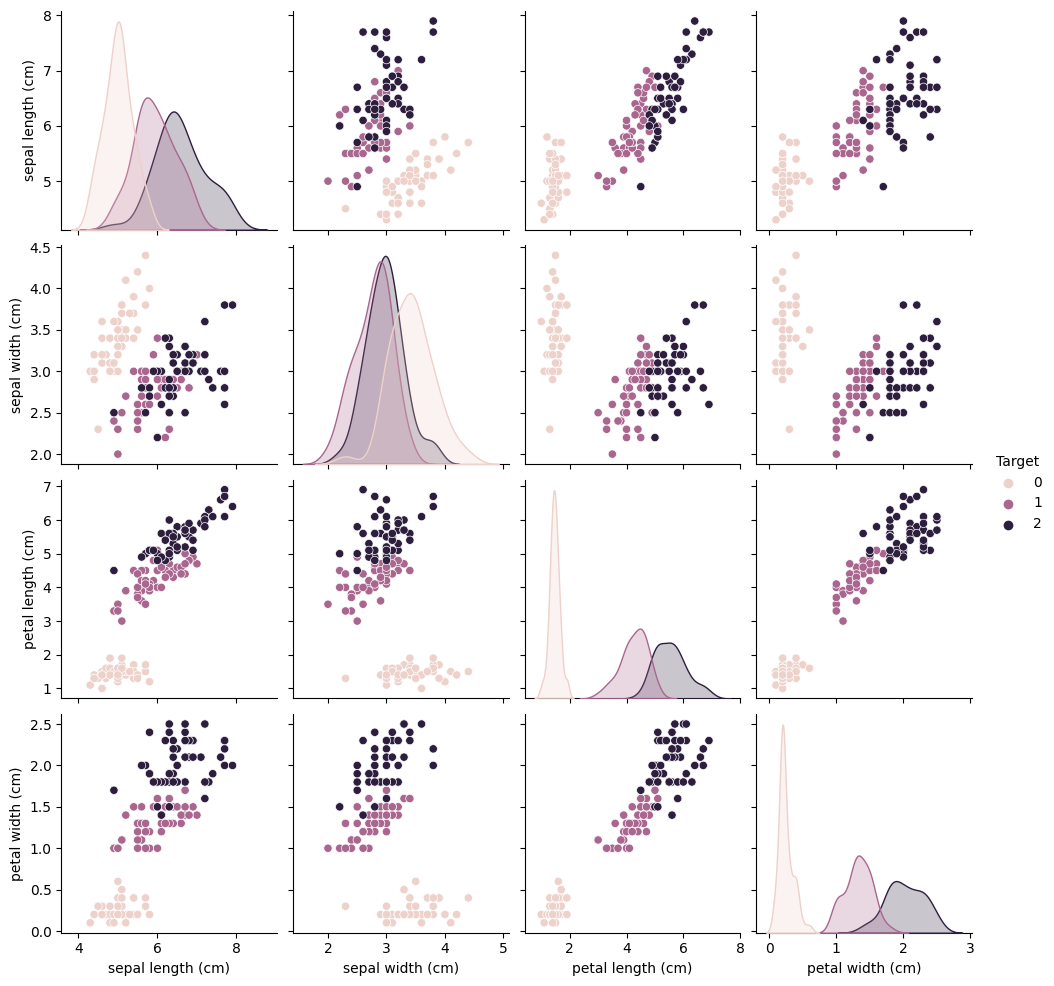

In [26]:
#usando o seaborn
sns.pairplot(iris, hue='Target');

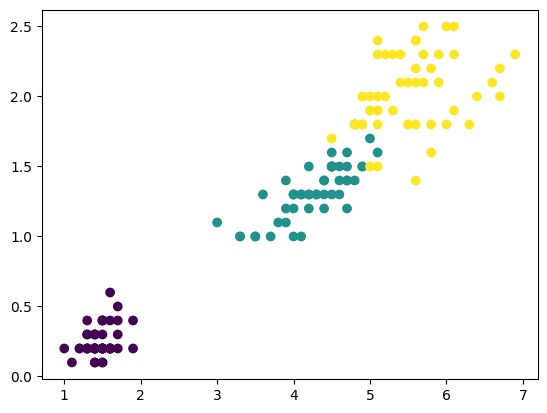

In [30]:
# Traçando um scatter do matplotlib das colunas "petal length (cm)" e "petal width (cm)"

fig, ax = plt.subplots()

ax.scatter(iris['petal length (cm)'],iris['petal width (cm)'], c = iris.Target)

plt.show()

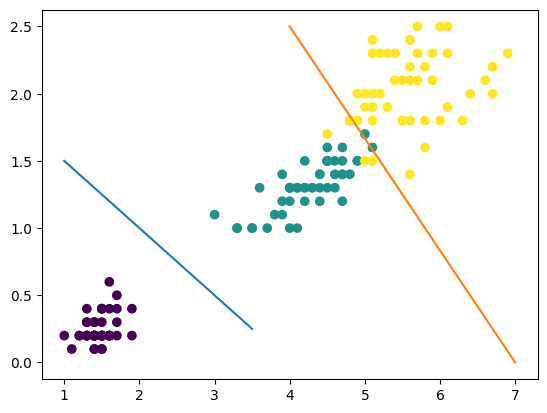

In [35]:
# Traçando o scatter plot e a reta para tentar separar os grupos
fig, ax = plt.subplots()

ax.scatter(iris['petal length (cm)'],iris['petal width (cm)'], c = iris.Target)

x_reta1 = [1, 3.5]
y_reta1 = [1.5, 0.25]
x_reta2 = [7, 4]
y_reta2 = [0, 2.5]

ax.plot(x_reta1, y_reta1)
ax.plot(x_reta2, y_reta2)

plt.show()

### Usando um algoritimo de machine learning para tentar descobrir uma reta melhor

vamos usar o perceptron

In [48]:
# Importando o perceptron e fazendo o fit
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=42)
clf.fit(X, y)

Perceptron(random_state=42)

In [49]:
clf.coef_

array([[  2.4,   6.8,  -9.6,  -4.9],
       [ 22.1, -42.2,  13.5, -44.5],
       [-42. , -33.8,  48.9,  51.8]])

In [50]:
clf.intercept_

array([  1.,  34., -22.])

#### Esses dados acima nada mais dão do que as os valores para as equações das retas mas como estamos com 4 variaveis serão 4 dimensões para fins didáticos vou dimnuir para 2 variáveis para explicar graficamente e deixar apenas 2 targets


In [64]:
x2 = iris[['petal length (cm)', 'petal width (cm)']]
iris = iris[iris.Target != 2]
y2 = iris.Target

In [65]:
# Fazendo o fit com o modelo
clf2 = Perceptron(tol=1e-3, random_state=42)
clf2.fit(x2, y2)

Perceptron(random_state=42)

In [66]:
clf2.coef_

array([[1.5, 2.2]])

In [67]:
clf2.intercept_

array([-5.])

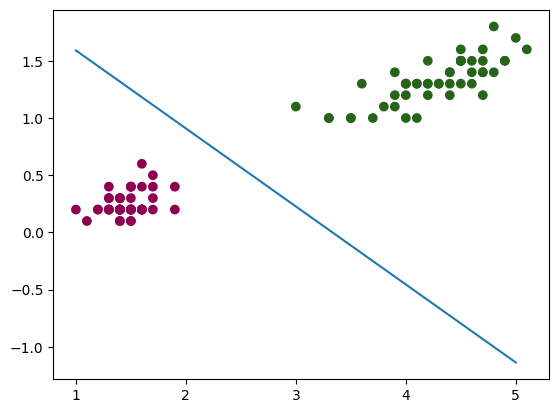

In [70]:
# Colocando tanto o perceptron quanto a reta que traçamos no gráfico
fig, ax = plt.subplots()

ax.scatter(iris['petal length (cm)'],iris['petal width (cm)'], c = iris.Target, cmap='PiYG')

x_reta = [1, 3]
y_reta = [2, 0]

# ax.plot(x_reta, y_reta, c = 'r')

x_perc = np.arange(1, 6)
y_perc = (-clf2.intercept_ - clf2.coef_[0][0]*x_perc)/clf2.coef_[0][1]

ax.plot(x_perc, y_perc)

plt.show()

Com menos dados facilita a expressão gráfica desse problema, agora analisando talvez o perceptron não fosse o melhor modelo para resolver esse problema talvez um de cluster fosse mais eficaz, mas o intuito desse projeto é só começar a entender como machine learning funciona